In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#PROBLEM-1

In [71]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sqlite_file="/content/drive/MyDrive/source files/lahman_1871-2022.sqlite"
conn=sqlite3.connect(sqlite_file)
command="SELECT *,sum(salary) as Total_Payroll FROM Salaries GROUP BY teamID,yearID"
salaries_df=pd.read_sql(command,conn)
salaries_df
command_teams="SELECT *,(CAST(W AS FLOAT)/(W+L)) * 100 AS Win_Percentage FROM Teams GROUP BY teamID,yearID"
teams_df=pd.read_sql(command_teams,conn)
teams_df.drop(columns=["Total_Games_won","Total_Games_won_2","Total_Games_won_1"],inplace=True)
teams_df=teams_df.sort_values(by="yearID")
teams_df

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,Win_Percentage
519,1871,NA,CH1,CNA,None,2,28,NaN,19,9,...,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1,67.857143
400,1871,NA,BS1,BNA,None,3,31,NaN,20,10,...,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1,66.666667
2398,1871,NA,RC1,ROK,None,9,25,NaN,4,21,...,0.821,Rockford Forest Citys,Agricultural Society Fair Grounds,NaN,97,99,ROK,RC1,RC1,16.000000
2900,1871,NA,TRO,TRO,None,6,29,NaN,13,15,...,0.845,Troy Haymakers,Haymakers' Grounds,NaN,101,100,TRO,TRO,TRO,46.428571
928,1871,NA,CL1,CFC,None,8,29,NaN,10,19,...,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1,34.482759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,2022,AL,MIN,MIN,C,3,162,81.0,78,84,...,0.985,Minnesota Twins,Target Field,1801128.0,98,99,MIN,MIN,MIN,48.148148
2029,2022,AL,OAK,OAK,W,5,162,80.0,60,102,...,0.984,Oakland Athletics,O.co Coliseum,787902.0,96,96,OAK,OAK,OAK,37.037037
2501,2022,AL,SEA,SEA,W,2,162,81.0,90,72,...,0.988,Seattle Mariners,T-Mobile Park,2287267.0,95,95,SEA,SEA,SEA,55.555556
1973,2022,NL,NYN,NYM,E,2,162,81.0,101,61,...,0.988,New York Mets,Citi Field,2564737.0,96,95,NYM,NYN,NYN,62.345679


In this step the dataset has been loaded into colab and converted into a dataframe using sqlite3 package.

Text(0.5, 1.0, 'Relation between Payrolls and Winning Chances')

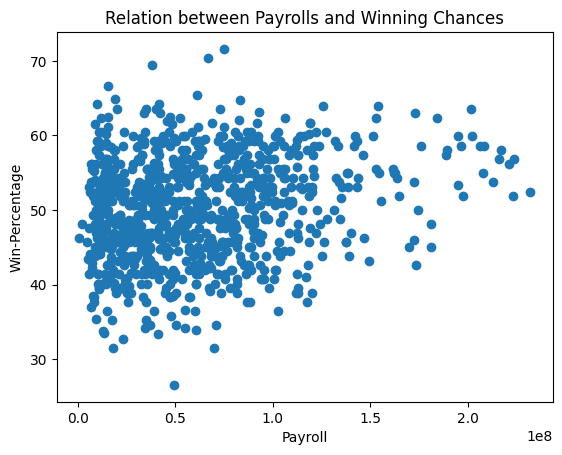

In [36]:
win_percentage_rtn_table=pd.merge (salaries_df,teams_df,on=["yearID","teamID"])
win_percentage_rtn_table
plt.scatter(win_percentage_rtn_table['Total_Payroll'],win_percentage_rtn_table['Win_Percentage'])
plt.xlabel("Payroll")
plt.ylabel("Win-Percentage")
plt.title("Relation between Payrolls and Winning Chances")

In this step both the tables have been "INNER JOINED" on yearID and team ID and a scatter plot is shown which just shows a relation between the payroll and win percentages. I have not separated the graph based on teams as I just wanted to give a idea on how the win and payroll are usually depended on each other.

**PROBLEM-1 DISCUSSIONS**

The missing values were present in the salaries dataset were dated from 1985 so when the two datasets were merged we will get values from 1985 and all other values shall be ignored.

# PROBLEM-2

<bound method PlotAccessor.bar of <pandas.plotting._core.PlotAccessor object at 0x7b84dc9116c0>>

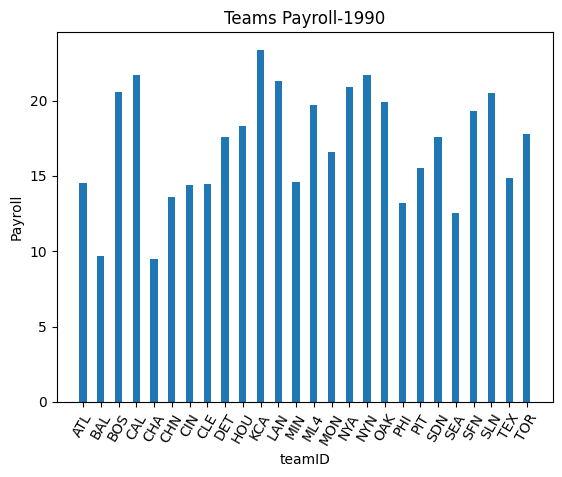

In [37]:
command_problem_2="SELECT teamID,sum(salary) as total_payroll FROM Salaries WHERE yearID == 1990 GROUP BY teamID"
sl_1990=pd.read_sql(command_problem_2,conn)
sl_1990['total_payroll']=pd.to_numeric(sl_1990['total_payroll'])
command_problem_2_1="SELECT teamID,sum(salary) as total_payroll FROM Salaries WHERE yearID == 2016 GROUP BY teamID"
sl_2022=pd.read_sql(command_problem_2_1,conn)
sl_2022['total_payroll']=pd.to_numeric(sl_2022['total_payroll'])
plt.bar(sl_1990['teamID'],sl_1990["total_payroll"]/1000000,0.4,label="1990")
plt.ylabel("Payroll")
plt.xlabel("teamID")
plt.title("Teams Payroll-1990")
plt.xticks(rotation=60)
sl_1990.plot.bar

In this step I have shown all the teams and their total Payrolls for the year 1990

<bound method PlotAccessor.bar of <pandas.plotting._core.PlotAccessor object at 0x7b84e1c978b0>>

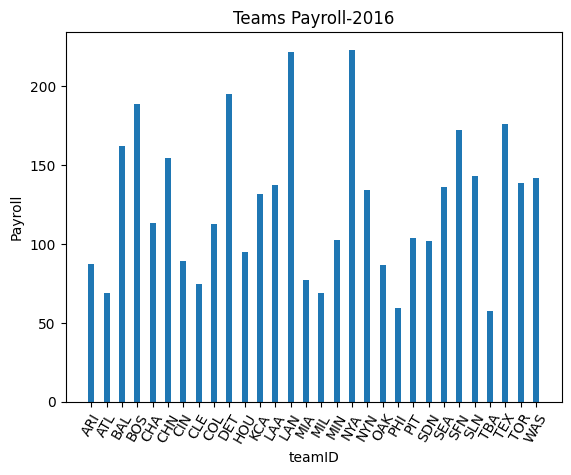

In [38]:
plt.bar(sl_2022['teamID'],sl_2022['total_payroll']/1000000,0.4,label="2016")
plt.ylabel("Payroll")
plt.xlabel("teamID")
plt.title("Teams Payroll-2016")
plt.xticks(rotation=60)
sl_2022.plot.bar

In this step I have shown all the teams and their total Payrolls for the year 2016.

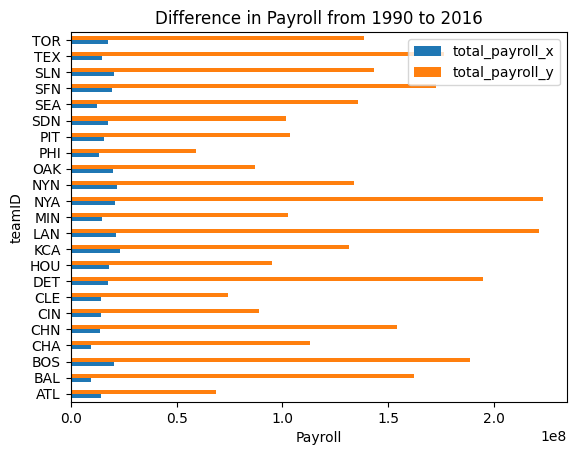

In [39]:
same_team_90_22=pd.merge(sl_1990,sl_2022,on="teamID")
same_team_90_22.index=same_team_90_22['teamID']
same_team_90_22.plot.barh()
plt.xlabel("Payroll")
plt.title("Difference in Payroll from 1990 to 2016")
plt.show()

This plot shows the total difference in the payrolls in 1990 and 2016. As ypu can see not all teams active in 1990 were still active in 2016 and vice versa as new team might be introduced into these big leagues. These are the pay differences for the teams active in both 1990 and 2016

Text(0.5, 1.0, 'Average Payroll from 1990 to 2016')

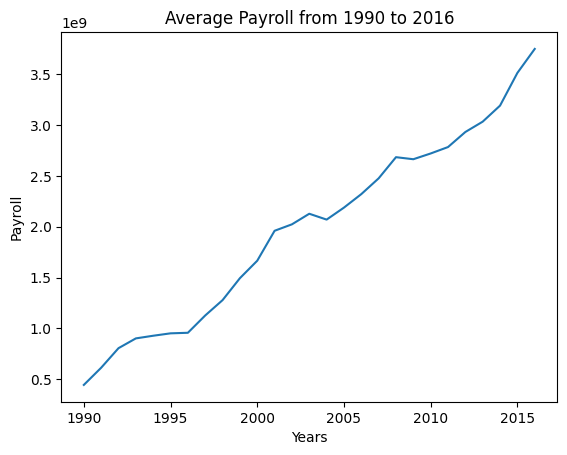

In [40]:
command_average_pay="SELECT *,sum(salary) as total_payroll FROM Salaries WHERE yearID >1989 GROUP BY yearID"
average_payroll=pd.read_sql(command_average_pay,conn)
average_payroll.index=average_payroll["yearID"]
plt.plot(average_payroll['yearID'],average_payroll['total_payroll'])
plt.xlabel("Years")
plt.ylabel("Payroll")
plt.title("Average Payroll from 1990 to 2016")

In this step I have shown the total increase in the average payroll for all the teams from 1990 to 2016.

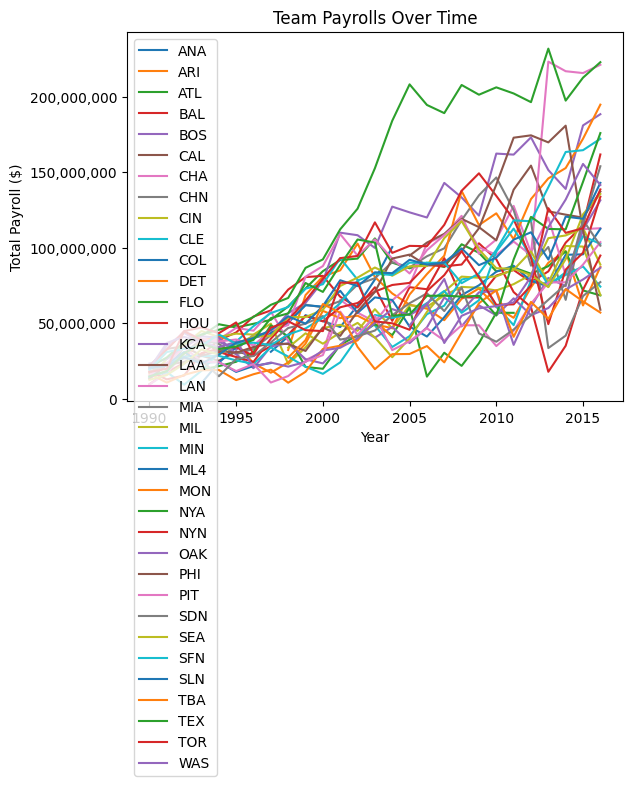

In [48]:
command_average_payroll_overtime="SELECT *,sum(salary) as Total_Payroll FROM Salaries WHERE yearID>1989 GROUP BY teamID,yearID"
average_payroll_over_time=pd.read_sql(command_average_payroll_overtime,conn)
average_payroll_over_time
fig, ax = plt.subplots()
for teamID, data in average_payroll_over_time.groupby('teamID'):
    ax.plot(data['yearID'], data['Total_Payroll'], label=teamID)
ax.set_title("Team Payrolls Over Time")
ax.set_xlabel("Year")
ax.set_ylabel("Total Payroll ($)")
ax.legend()
plt.show()

The graph looks kind of unclear but it just shows how the avrage payroll has increased for all the teams over time(1990-2016).

QUESTION-**1**

The Mean payroll has increased over time. All the teams increased funding to buy players. Over time the average payroll have increased.

# PROBLEM-3

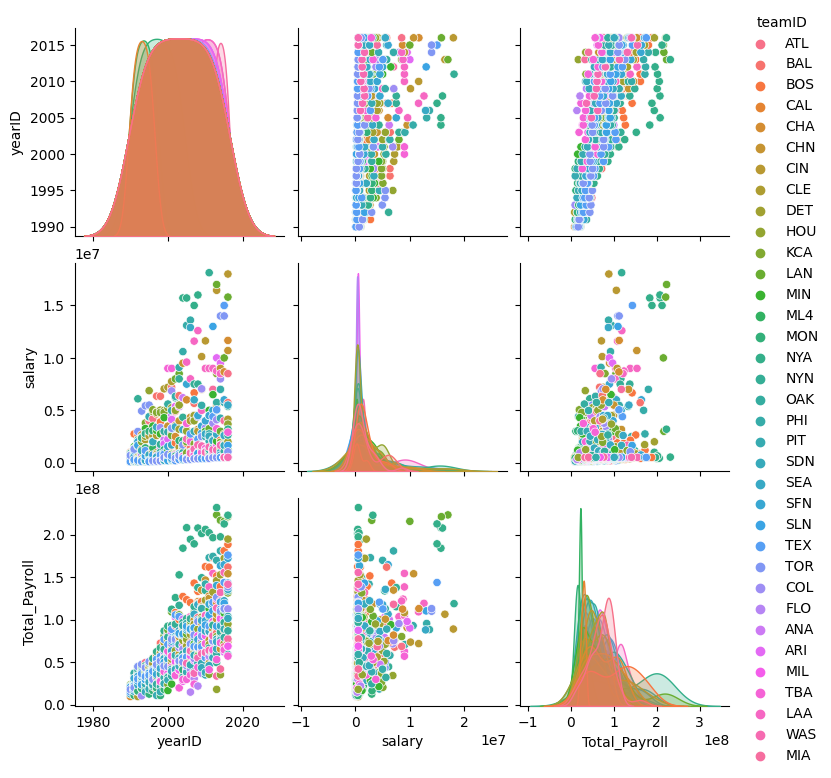

In [47]:
sns.pairplot(average_payroll_over_time,hue="teamID")

This is just a pairplot for our reference which shows many things over time and payroll comparisons. The main thing to observe in this plot is to see that all the salaries that the team provided for the players has roughly increased by over 10 times.

<Axes: xlabel='yearID', ylabel='total_payroll'>

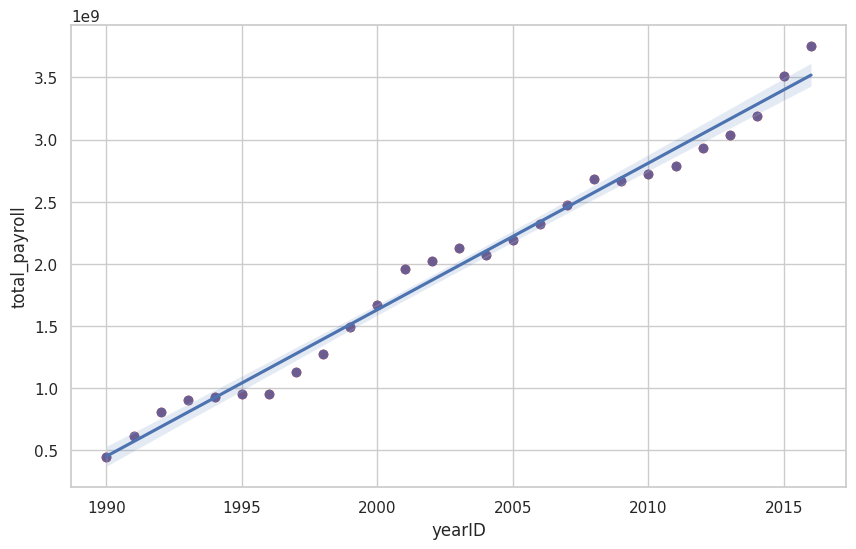

In [130]:
plt.figure(figsize=(10, 6))
plt.scatter(data=average_payroll, x='yearID', y='total_payroll', color='red')
sns.regplot(x=average_payroll['yearID'],y=average_payroll['total_payroll'])

**QUESTION 1**

This proves our statement that the average salaries has increased over time.

The above graph shows the payrolls team provided to their players over the years. As the years progressed we can that the regression line has a positive slope and the values have increased from somewhere around 0.5 to closing in on 4.

# PROBLEM-4

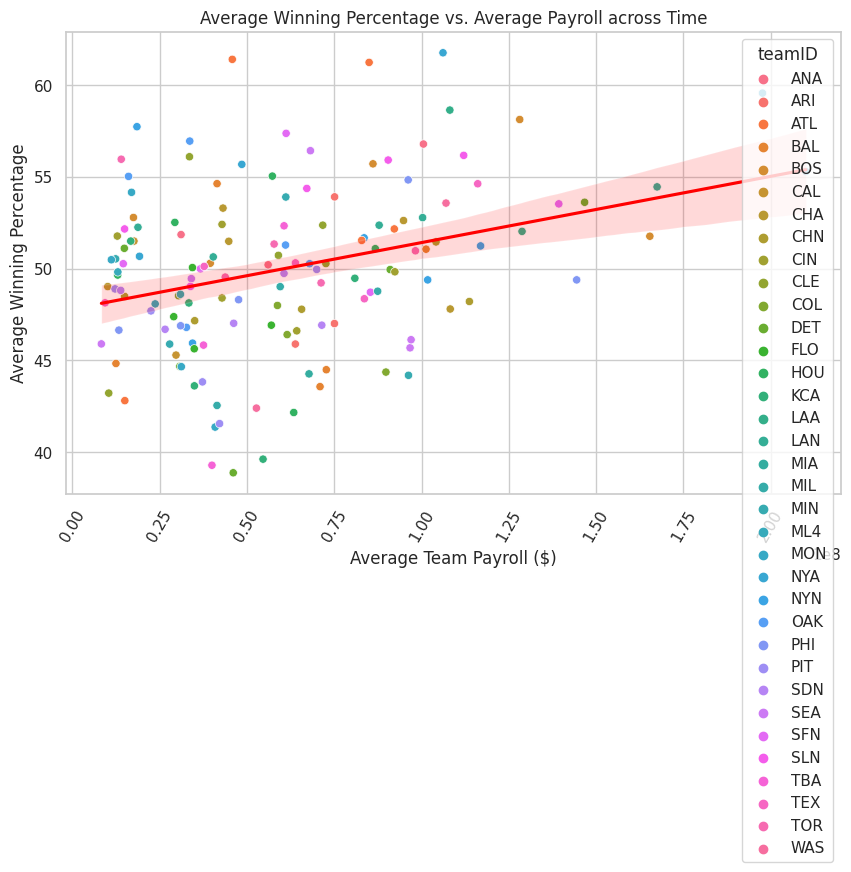

In [134]:
win_percentage_rtn_table["time-cuts"]=pd.cut(win_percentage_rtn_table["yearID"],bins=5)
mean_stats = win_percentage_rtn_table.groupby(['time-cuts', 'teamID']).agg(win_percentage_rtn_table=("Total_Payroll",'mean'), avg_win_percent_over_time=('Win_Percentage', 'mean')).reset_index()
mean_stats["Payroll"]=mean_stats['win_percentage_rtn_table']
mean_stats.drop(columns="win_percentage_rtn_table",inplace=True)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mean_stats, x='Payroll', y='avg_win_percent_over_time', hue="teamID")
sns.regplot(data=mean_stats, x='Payroll', y='avg_win_percent_over_time', scatter=False, color='red')
plt.xlabel('Average Team Payroll ($)')
plt.ylabel('Average Winning Percentage')
plt.title('Average Winning Percentage vs. Average Payroll across Time')
plt.xticks(rotation=60)
plt.show()

In this step the total time from 1985 to 2016 has been divided into 5 equal parts. In this step I have just grouped the five parts together and also grouped the teams together and then called the mean on the payroll and winning percentages of all the teams.

**QUESTION 2**

This graph shows that if a team spends more money on players then the winning percentages also increase over time.

THE OAKLAND A'S showed a high percentage of wins even though having limited funds.

# PROBLEM-5

In [105]:
team_payrolls = win_percentage_rtn_table.groupby(['yearID', 'teamID']).agg(team_payroll=('Total_Payroll', 'sum')).reset_index().merge(mean_stats)
avg_payroll_tab = team_payrolls.groupby('yearID').agg(mean_payroll=('team_payroll', 'mean'), sd_payroll=('team_payroll', 'std')).reset_index()
std_tab = team_payrolls.merge(avg_payroll_tab).assign(std_payroll=lambda x: (x['team_payroll'] - x['mean_payroll']) / x['sd_payroll'])
std_tab

,yearID,teamID,team_payroll,time-cuts,avg_win_percent_over_time,Payroll,mean_payroll,sd_payroll,std_payroll
0,1985,ATL,14807000.0,"(1984.969, 1991.2]",42.798790,1.503626e+07,1.007557e+07,2.432236e+06,1.945302
1,1985,ATL,14807000.0,"(1991.2, 1997.4]",61.407570,4.581045e+07,1.007557e+07,2.432236e+06,1.945302
2,1985,ATL,14807000.0,"(1997.4, 2003.6]",61.240998,8.498567e+07,1.007557e+07,2.432236e+06,1.945302
3,1985,ATL,14807000.0,"(2003.6, 2009.8]",52.160494,9.219656e+07,1.007557e+07,2.432236e+06,1.945302
4,1985,ATL,14807000.0,"(2009.8, 2016.0]",51.536363,8.285948e+07,1.007557e+07,2.432236e+06,1.945302
...,...,...,...,...,...,...,...,...,...
4585,2016,MIA,77314202.0,"(1984.969, 1991.2]",NaN,NaN,1.250046e+08,4.600180e+07,-1.036707
4586,2016,MIA,77314202.0,"(1991.2, 1997.4]",NaN,NaN,1.250046e+08,4.600180e+07,-1.036707
4587,2016,MIA,77314202.0,"(1997.4, 2003.6]",NaN,NaN,1.250046e+08,4.600180e+07,-1.036707
4588,2016,MIA,77314202.0,"(2003.6, 2009.8]",NaN,NaN,1.250046e+08,4.600180e+07,-1.036707


In this step another variab le is added which standardizes the data throughout the table making sure all the values are present in a standardized range. In thie step I grouped the "time-cuts" and the teamID again to get the standardized and aggregate payrolls of all players during that time-frame. I took out the average payroll and then subtracted it from each payroll value and dividing it up by the mean standard deviation.

# PROBLEM 6

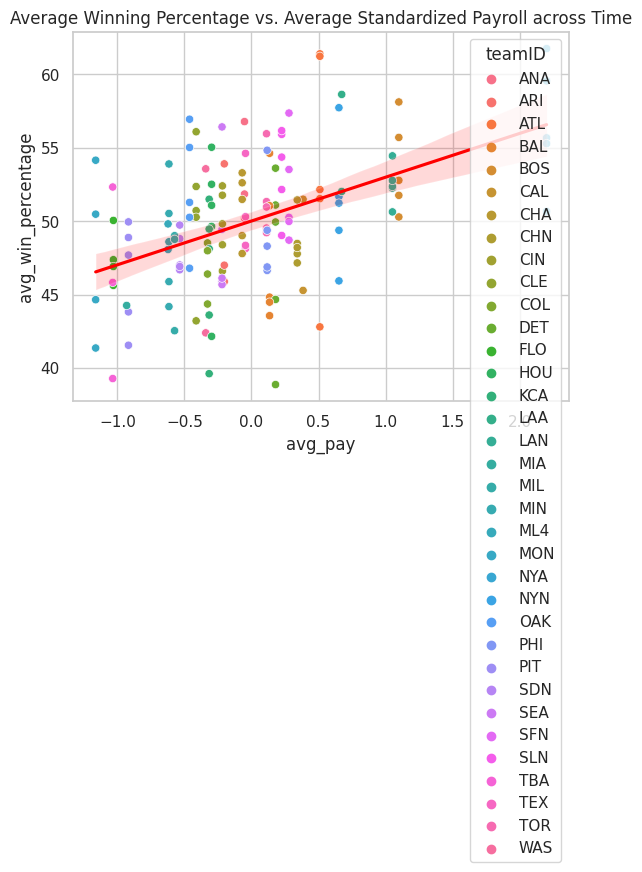

In [128]:
grouped_data = std_tab.groupby(['time-cuts', 'teamID']).agg(avg_pay=('std_payroll', 'mean'),avg_win_percentage=('avg_win_percent_over_time', 'mean'))
grouped_data = grouped_data.reset_index()
sns.set(style='whitegrid')
scatter_plot = sns.scatterplot(data=grouped_data, x='avg_pay', y='avg_win_percentage', hue='teamID')
scatter_plot.set(xlabel='Average Standard Team Payroll', ylabel='Average Winning Percentage (%)',
                 title='Average Winning Percentage vs. Average Standardized Payroll across Time')
sns.regplot(data=grouped_data, x='avg_pay', y='avg_win_percentage', scatter=False, color='red')
scatter_plot.title.set_ha('center')
plt.show()

QUESTION 3

The data is now standardized and all the teams have the mean and std on the same scale unlike the one in problem 4. This graph is easier for us to read now.

# PROBLEM 7

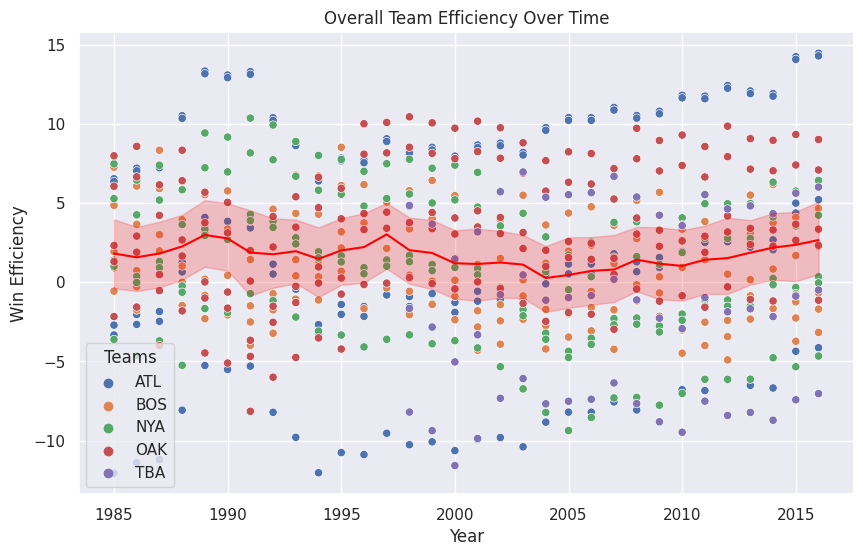

In [122]:
std_tab['exp_win_percentage'] = 50 + 2.5 * std_tab['std_payroll']
filtered_std_tab = std_tab[std_tab['teamID'].isin(["OAK", "BOS", "NYA", "ATL", "TBA"])]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_std_tab, x='yearID', y='efficiency', hue='teamID')
sns.lineplot(data=filtered_std_tab, x='yearID', y='efficiency', color='red')
plt.xlabel('Year')
plt.ylabel('Win Efficiency')
plt.title('Overall Team Efficiency Over Time')
plt.legend(title='Teams')
plt.show()

The Regression line shows the expected wins if a team spends certain amount of money. all the points present in the graph show the amount the team has spend on the players and the number of matches they won that season.

# PROBLEM 8

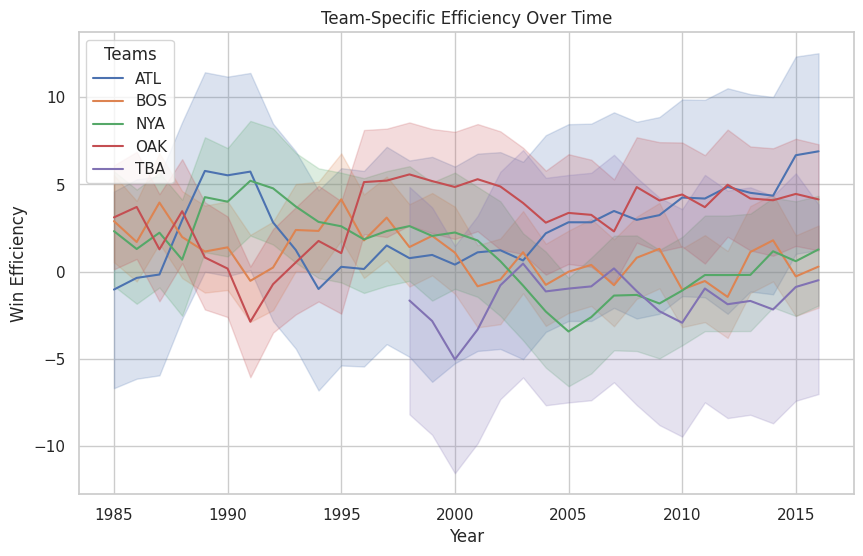

In [135]:
sample = std_tab[['teamID', 'yearID', 'avg_win_percent_over_time', 'exp_win_percentage']].sample(n=10)
std_tab['efficiency'] = std_tab['avg_win_percent_over_time'] - std_tab['exp_win_percentage']
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_std_tab, x='yearID', y='efficiency', hue='teamID')
plt.xlabel('Year')
plt.ylabel('Win Efficiency')
plt.title('Team-Specific Efficiency Over Time')
plt.legend(title='Teams')
plt.show()

QUESTION 4

We can clearly see that the OAKLAND A'S, in the period, 1997-2202 dominated the league in winning efficiency even when they a low spending budget. The strategy used by the team peaked in this point of time.